# Objective

- Preliminary Data Analysis. Explore the dataset and practice extracting basic observations about the data. The idea is for you to get comfortable working in Python.

# Context

- The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run

### importing the necessary libraries

In [1]:
# Importing libraries 
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
# To enble plots in the notebook
%matplotlib inline 
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')
#sns.set(color_codes=True)

In [2]:
pwd # Current working directory

'/Users/sundeep/Learnings/1_PGP_DSBA/21_Project/Treadmill'

### Read the data from CSV to DataFrame

In [3]:
# importing input CSV file.
df = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# Copying data to another dataframe , Original data will not be changed and available in df dataframe
data = df.copy()

In [5]:
# Data types of all variables
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
# No of rows and columns
data.shape

(180, 9)

<font color=darkblue>
    
### Observation
    
- In the data set we have 180 rows and 9 columns.

### View the first few rows of the dataset

In [7]:
# Top 5 rows
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


<font color = darkblue>
    
## Observation
    
- Age , Gender , Education and MaritalStatus provide details of the customer
- Product column has treadmill details
- Usage provide details related Avg times the customer wants to use the treadmill every week
- Fitness has Self rated fitness score of the customer
- Miles has details of expected miles customer want to run

In [8]:
# Last 5 rows
data.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [9]:
# Column data types and their count , The resulting object of value_counts will be in descending order
data.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
TM798    48   Male    18         Partnered      4      5        95508   180      1
TM195    36   Male    12         Single         4      3        44343   94       1
         35   Female  18         Single         3      3        67083   85       1
                      16         Partnered      3      3        60261   94       1
         34   Male    16         Single         4      5        51165   169      1
                                                                                ..
TM498    32   Male    16         Partnered      3      3        53439   95       1
         31   Male    16         Partnered      3      3        52302   95       1
              Female  18         Single         2      1        65220   21       1
                      16         Partnered      2      3        51165   64       1
TM195    18   Male    14         Single         3      4        29562   112      1
Length: 1

<font color=darkblue>
    
## Observation 

- In the given dataset we do not have any duplicate values

In [67]:
# Check whether we have duplicate values or not
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [10]:
# Information about the columns of the input file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<font color=darkblue>
    
## Observation 
    
- No null values in the dataset

In [11]:
# Changing the datatypes of variables.

'''data[data.Product] = data.Product.astype('category')
data[data.Gender] = data.Gender.astype('category')
data[data.MaritalStatus] = data.MaritalStatus.astype('category')
'''

data['Product'] = data.Product.astype('category')
data['Gender'] = data.Gender.astype('category')
data['MaritalStatus'] = data.MaritalStatus.astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


In [13]:
data.describe(include='all') # details about the data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


<font color=darkblue>
    
## Observation
    
- We have positive skew in Miles and Income
- Minimum age of customer is 18 and maximum age is 50
- Average usage of treadmill is 3.4 with average fitness of 3.3
- 3 unique products and 2 Genders were considered for analysis

In [14]:
data.describe(include=['category'])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,TM195,Male,Partnered
freq,80,104,107


In [15]:
# Mean value of all numeric variables 
data.mean()

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

<font color=darkblue>
    
## Observation 
- Average age of the customer is around 29
- Customer want to run average miles of 103

In [16]:
# Mode of all variables
data.mode()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


In [17]:
# Median of all the values
data.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [18]:
# check for missing values - isna() or isnull()
# data.isna().sum()

data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<font color=darkblue>

## Observation
- No null values in the dataset

In [19]:
#Values below 25% of the data lies
data.quantile(q=0.25)

Age             24.00
Education       14.00
Usage            3.00
Fitness          3.00
Income       44058.75
Miles           66.00
Name: 0.25, dtype: float64

In [20]:
#Values below 50% of the data lies
data.quantile(q=0.50)

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
Name: 0.5, dtype: float64

In [21]:
#Values below 75% of the data lies
data.quantile(q=0.75)

Age             33.00
Education       16.00
Usage            4.00
Fitness          4.00
Income       58668.00
Miles          114.75
Name: 0.75, dtype: float64

In [22]:
# IQR value for all numeric variables
data.quantile(0.75) - data.quantile(0.25)

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [23]:
# IQR value for Income
data['Income'].quantile(0.75) - data['Income'].quantile(0.25)

14609.25

In [24]:
# IQR value for Miles
data['Miles'].quantile(0.75) - data['Miles'].quantile(0.25)

48.75

In [25]:
# IQR value for Education
data['Education'].quantile(0.75) - data['Education'].quantile(0.25)

2.0

In [26]:
# Range of variables
data['Income'].max() - data['Income'].min()

75019

# Exploratory Data Analysis


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

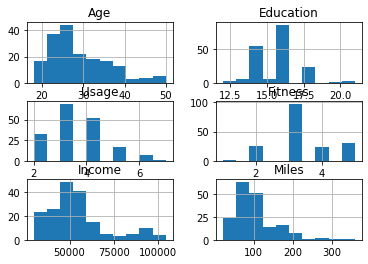

In [68]:
data.hist()

In [69]:
# Function for  Histogram and boxplot to analyze each and every variable

def hist_box(feature,figsize=(15,10),bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.20, .80)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, rug=True,ax=ax_hist2, bins=bins,color='g') if bins else sns.distplot(feature, kde=True,rug=True,ax=ax_hist2,color='r') # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

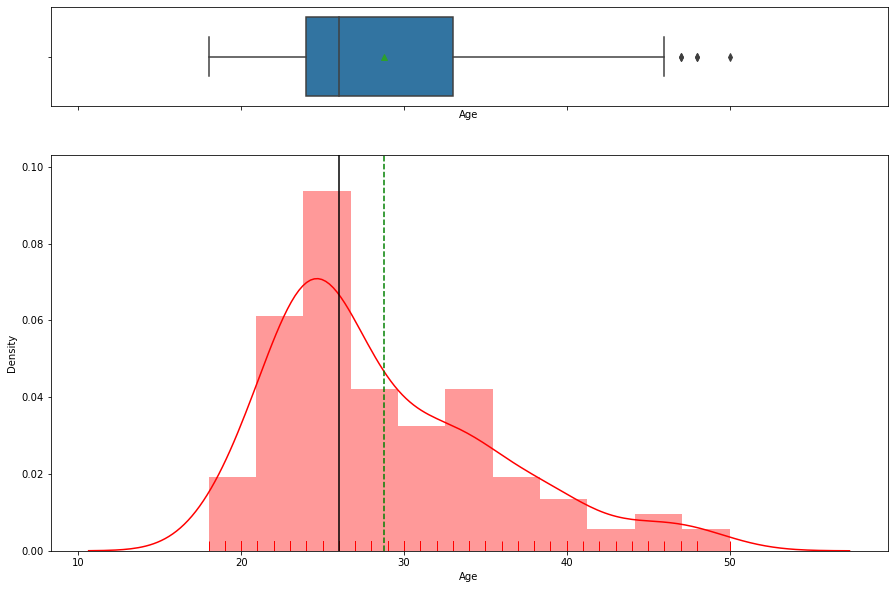

In [70]:
hist_box(data.Age)

<font color = 'darkblue'>

## Observation
    
- Age has outlayers , with positive skew
- Average Age of the customer is 29 , Median 26
- Maximum age is 50   
- Mean and Median are close
- 75% of the customers are below age of 33

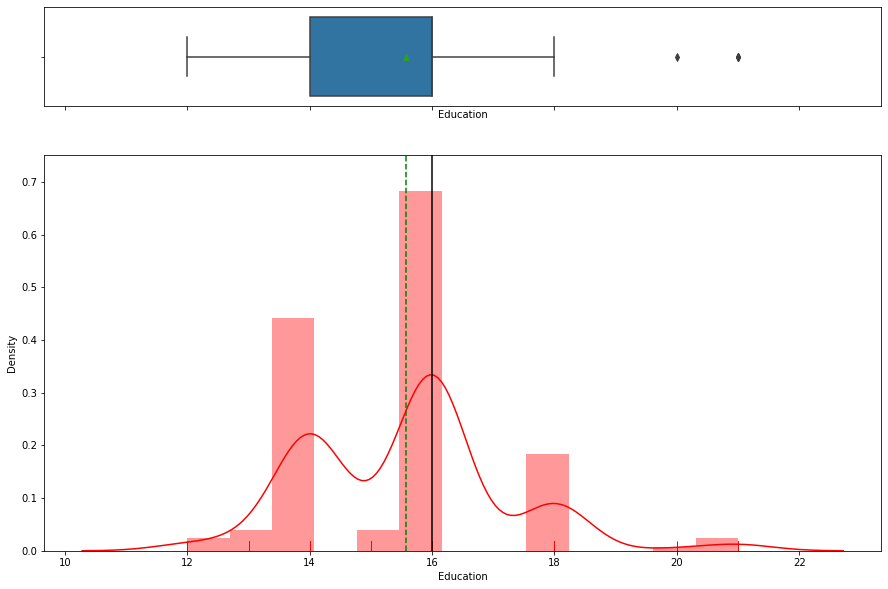

In [29]:
hist_box(data.Education)

<font color = 'darkblue'>

## Observation
- Minimum Education of the client is 12 and maximum is 21
- We do have out layers , indicates some customers are well educated

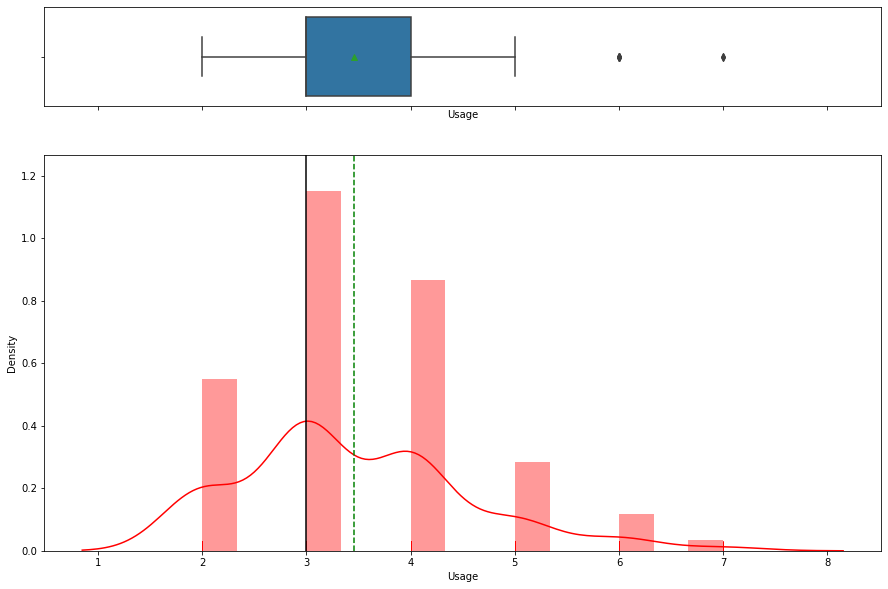

In [30]:
hist_box(data.Usage)

<font color = 'darkblue'>
    
## Observation
    
- Minimum Usage of the treadmill by the client is 2 and maximum is 7
- We do have out layers , indicates some customers want to use treadmill very high

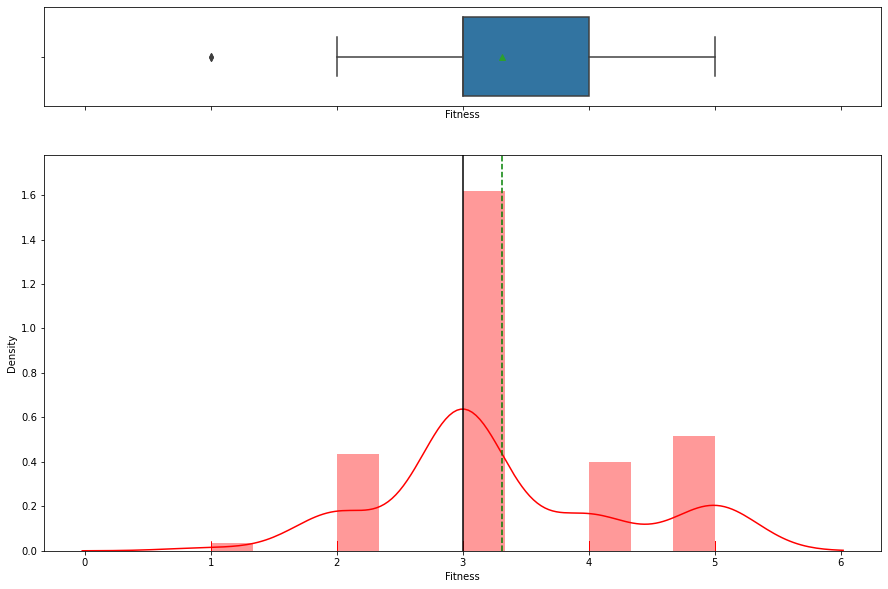

In [31]:
hist_box(data.Fitness)

<font color = 'darkblue'>
    
## Observation
    
- Minimum Fitness of the customer is 1 and maximum is 5
- We do have out layers which are less than 25% of the data, indicates some customers are not fit

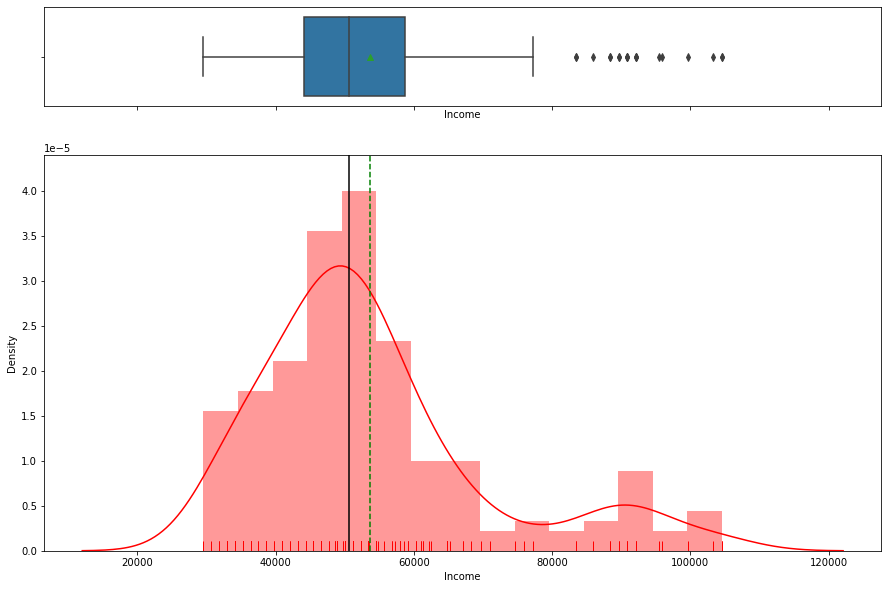

In [32]:
hist_box(data.Income)

<font color = 'darkblue'>
    
## Observation
    
- Minimum Income of the customer is 29K and maximum is 104K
- Average Income is 50K.
- We do have positive out layers , which means to say customer with high income are available

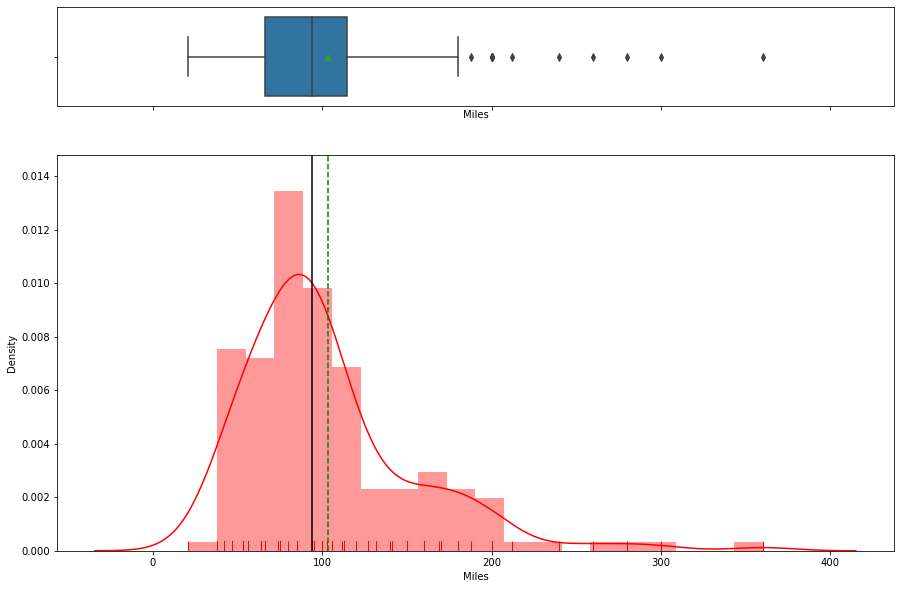

In [33]:
hist_box(data.Miles)

<font color = 'darkblue'>
    
## Observation
    
- Minimum miles customer want to run is 21 and maximum is 360.
- Average miles is 103.
- We do have positive skew , average miles customer want to run is very high

# Categorical variable analysis

In [34]:
# Function to return the percentage of categorical variable
def bar_perc(plot, feature):
    
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),size = 15)

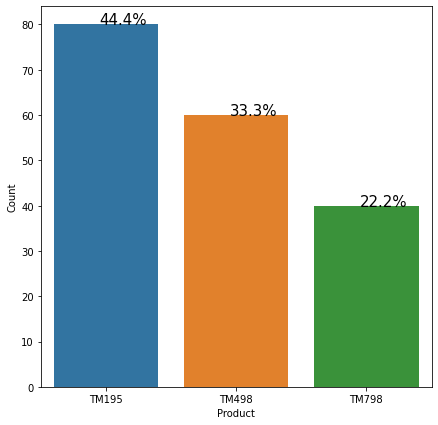

In [35]:
# Product count analysis 
plt.figure(figsize=(7,7))
ax = sns.countplot(data['Product'])
plt.xlabel('Product')
plt.ylabel('Count')
bar_perc(ax,data['Product'])
plt.show()

<font color = 'darkblue'>

## Observation
- 44% of the data is about TM195 , 33% is about TM498 and 22% is about TM798 product

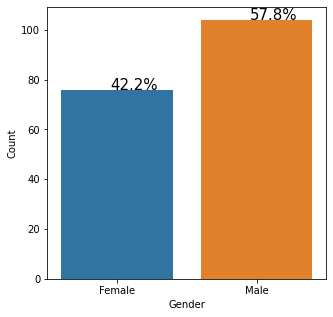

In [36]:
# Gender count analysis 
plt.figure(figsize=(5,5))
ax = sns.countplot(data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
bar_perc(ax,data['Gender'])

<font color = 'darkblue'>

## Observation
- 42% of the data is talking about Female and 58% of the data is about Male

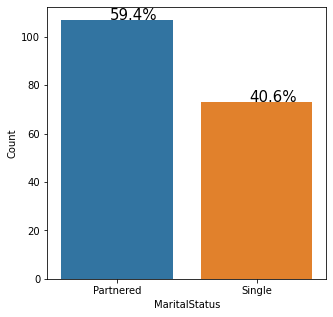

In [37]:
# Gender count analysis 
plt.figure(figsize=(5,5))
ax = sns.countplot(data['MaritalStatus'])
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
bar_perc(ax,data['MaritalStatus'])

<font color=darkblue>
    
### Observation
    
- In the data set we have 59% of Partnered people and 41% of Single

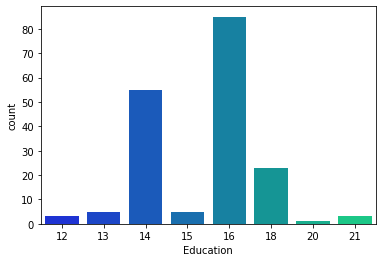

In [71]:
ax = sns.countplot(data['Education'],palette='winter')

In [38]:
# Variance value
data.var()

Age          4.821217e+01
Education    2.614867e+00
Usage        1.176785e+00
Fitness      9.194289e-01
Income       2.724706e+08
Miles        2.689833e+03
dtype: float64

In [39]:
# Standard deviation
data.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

In [40]:
# Coveriance
data.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [41]:
# Correlation
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


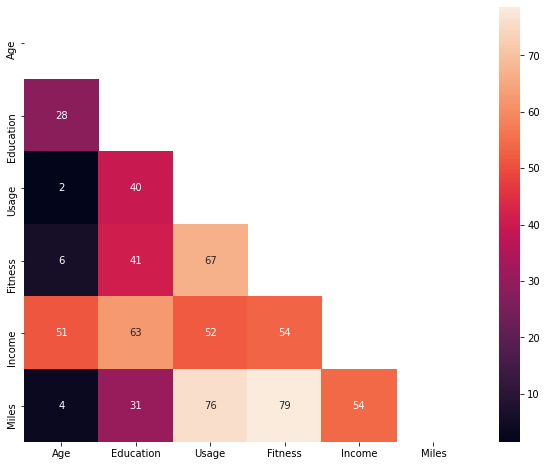

In [42]:
# Correlation plot for all numeric variables
plt.figure(figsize=(10,8))
corr = data.corr()
corr = corr * 100 # percentage conversion
mask = np.zeros_like(corr,dtype=np.bool) # To remove the other half which is duplicate
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,fmt='.0f', mask=mask);

<font color=darkblue>
    
## Observations

- As expected, Age and Miles has less correlation, people will high age may not be able to run more miles. This is in line with our intuitive understanding.
- Miles and Usage has positive correlation
- No negative correlation among the features
- Miles and Fitness has positive correlation
- There does not seems to be no high correlation between Miles, Usage and Fitness
- Fitness and Usage has positive correlation

In [43]:
data.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

## Biviriate Analysis

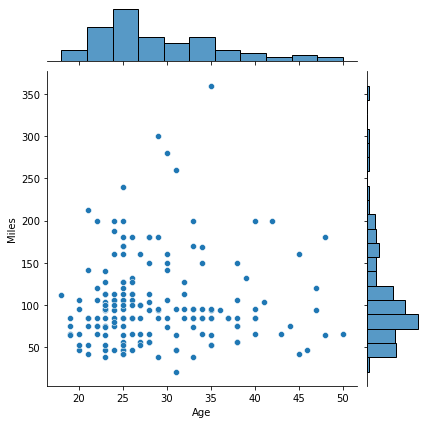

In [44]:
# Distrubution of data across Age and Miles
sns.jointplot(data['Age'],data['Miles']);

<font color=darkblue>
    
## Observation
    
- People with age less than 35 want to make lot of miles

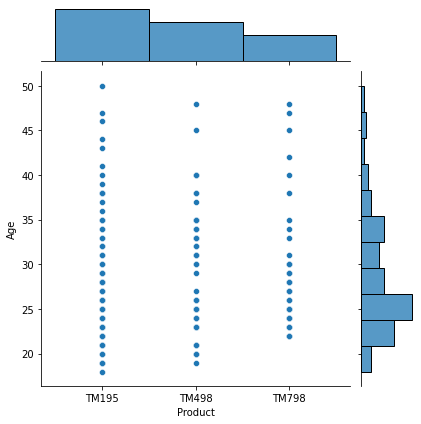

In [45]:
# Product vs Age plot.
sns.jointplot(x = 'Product', y= 'Age',data=data);

<font color=darkblue>
    
## Observation 
    
- People with age less than 20 , like product TM195 and TM498

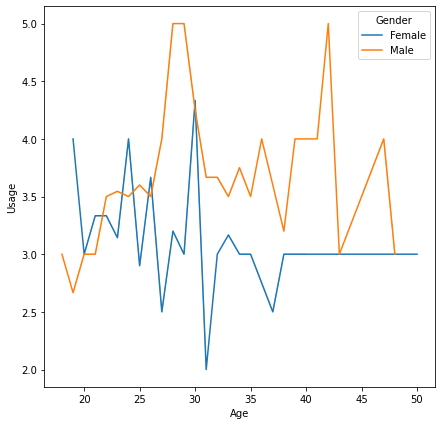

In [46]:
# Age vs Usuage 
plt.figure(figsize=(7,7))
sns.lineplot(x= 'Age', y = 'Usage',hue='Gender',data=data,ci=0);

<font color=darkblue>
    
## Observation 
    
- Male want to use the treadmill more when compare to female

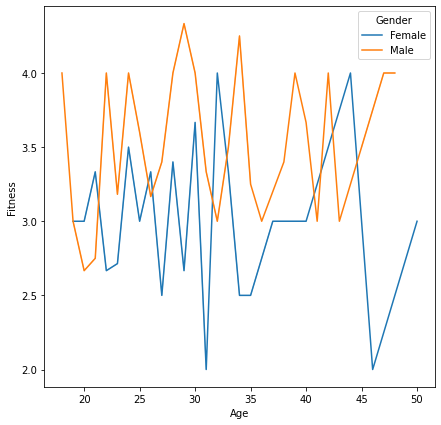

In [47]:
# Age vs Fitness 
plt.figure(figsize=(7,7))
sns.lineplot(x= 'Age', y = 'Fitness',data=data, hue = 'Gender', ci=0); # Lineplot with Hue

<font color=darkblue>
    
## Observation 
    
- Male has more fitness when compared to female

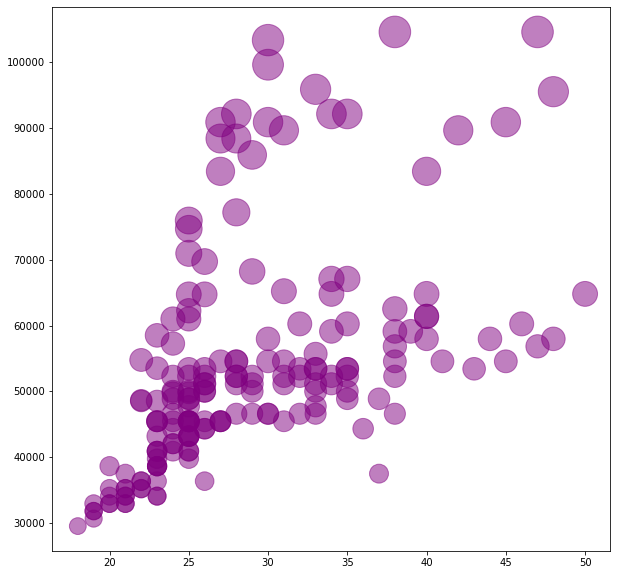

In [48]:
# Scattered plot for Income and Age.
plt.figure(figsize=(10,10))
i_normal = (data.Income / data.Income.max()) * 1000 # Normalize the data
age=data.Age
income=data.Income
plt.scatter(x=age, y=income, color='purple', s=i_normal,alpha=0.5)

<font color=darkblue>
    
## Observation 
    
- As expected, Age increases, Income also increases until age of 50.
- For majority of the People with Age greater than 30 , Income is more than 40K

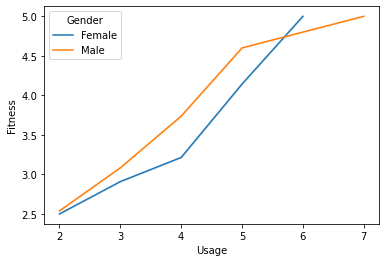

In [49]:
# Age vs Income
sns.lineplot(x= 'Usage', y = 'Fitness',data=data, hue = 'Gender', ci=0);

<font color=darkblue>
    
## Observation 
- As expected, higher the Usage, higher the Fitness

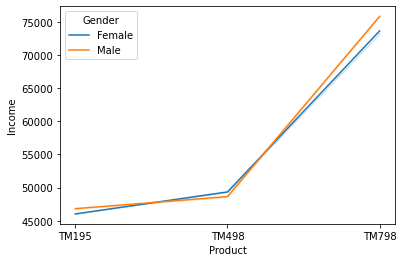

In [50]:
# sns.lineplot(x= 'Age', y = 'Fitness',data=data, hue = 'Gender', ci=0);
sns.lineplot(x='Product',y= 'Income',hue= 'Gender' , data = data,ci=0);

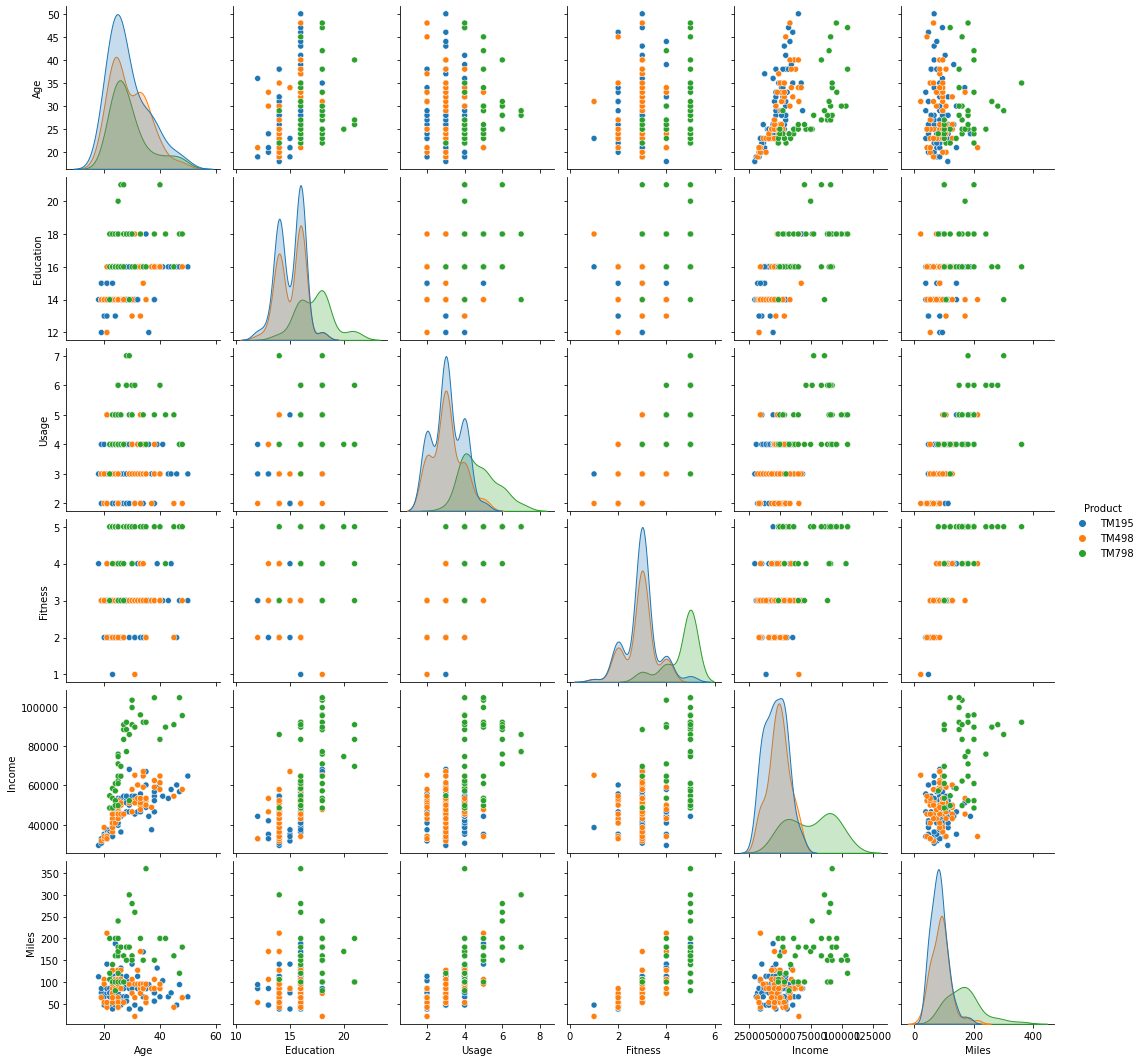

In [72]:
sns.pairplot(data=data,hue='Product');

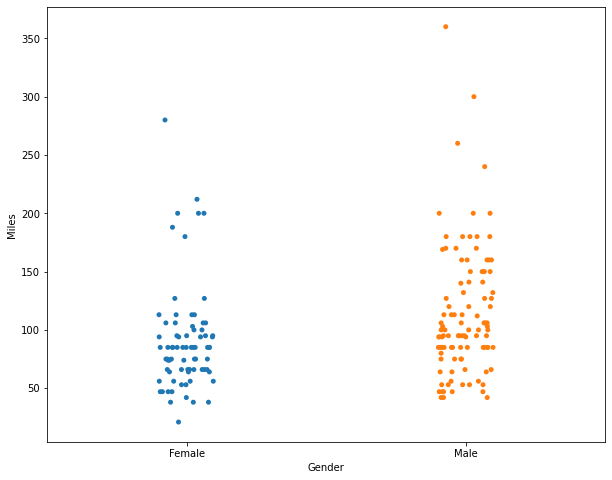

In [52]:
plt.figure(figsize=(10,8))
sns.stripplot(data['Gender'],data['Miles'],jitter=True);

<font color=darkblue>
    
## Observation 
    
- Male want to make lot of miles

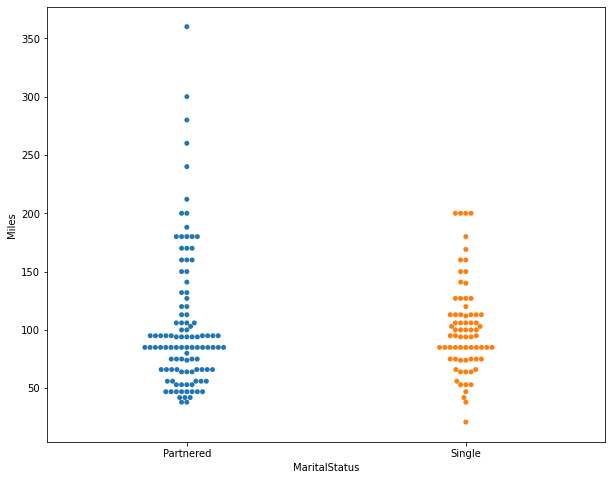

In [53]:
plt.figure(figsize=(10,8))
sns.swarmplot(data['MaritalStatus'],data['Miles']);

<font color=darkblue>
    
## Observation 
- Married couple want to make more miles when compared to single

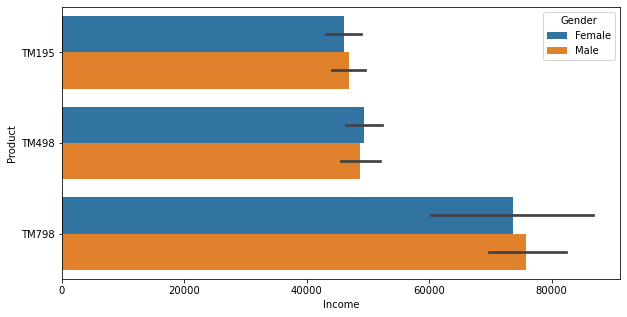

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(data['Income'],data['Product'],hue=data['Gender']);

<font color=darkblue>
    
## Observation 
    
- TM798 has high income people

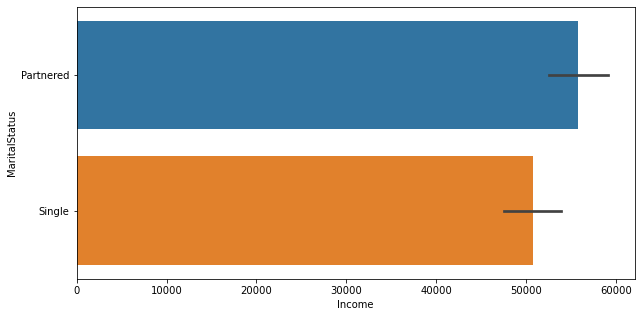

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data['Income'],data['MaritalStatus']);

<font color=darkblue>
    
## Observation 
    
- Partnered people has more income when compared to single

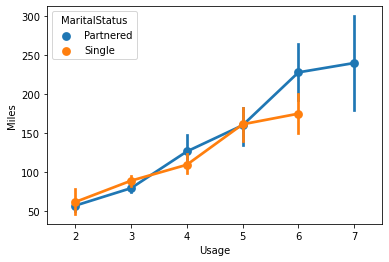

In [56]:
sns.pointplot(data['Usage'],data['Miles'],hue=data['MaritalStatus']);

<font color=darkblue>
    
## Observation 
- Partnered martial status want to make more miles when compared to single

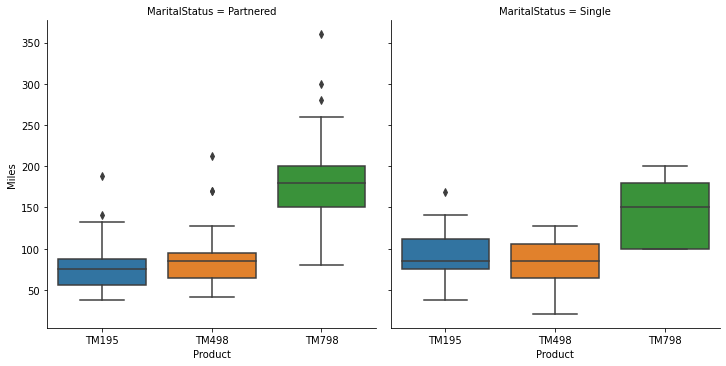

In [57]:
sns.catplot(x='Product',
            y='Miles',
            col='MaritalStatus',
            data=data,
            kind='box');

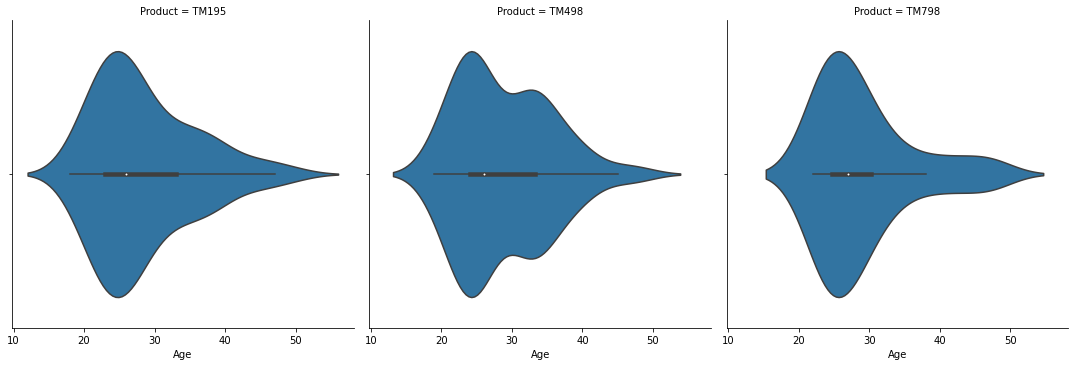

In [58]:
# Violin plot
sns.catplot(x='Age',
             col='Product', 
             data=data,
             col_wrap=4,
             kind="violin")

<font color=darkblue>
    
## Observation 
- Maximum usage of treadmill is by people from age 40 to 20


In [59]:
data.groupby('Product')['Fitness'].mean()

Product
TM195    2.9625
TM498    2.9000
TM798    4.6250
Name: Fitness, dtype: float64

In [60]:
data.groupby('Product')['Usage'].mean()

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

In [61]:
data.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

<font color=darkblue>
    
## Observation 

- Product TM798 has more Fitness and Usage when compare to others
- Average income of people for TM798 is 75K
- People with income less than 50K , has TM195 and TM498

<Figure size 504x360 with 0 Axes>

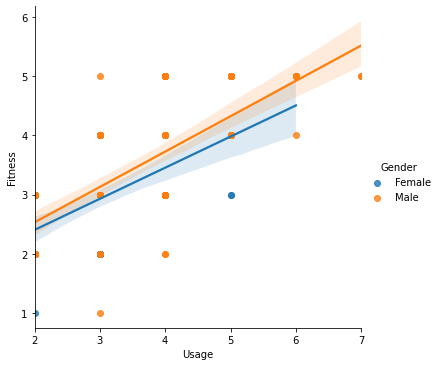

In [62]:
plt.figure(figsize=(7,5))
sns.lmplot(y='Fitness',x='Usage',hue = 'Gender' , data=data);

<font color=darkblue>
    
## Observation 

- Fitness and Usage has linear increase

Mean Age: 28.788888888888888 
Median Age: 26.0 
Mode Age: 0    25
dtype: int64


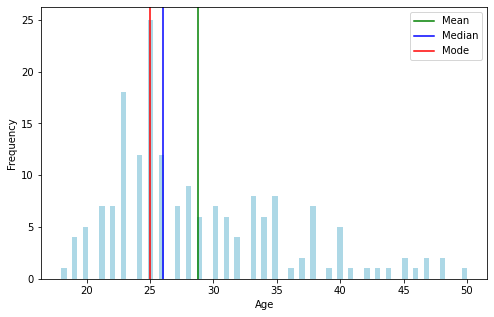

In [63]:
# Histogram plot for Age variable

mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode()

print('Mean Age:',mean_age,'\nMedian Age:',median_age,'\nMode Age:',mode_age)

plt.figure(figsize=(8,5))
plt.hist(data['Age'],bins=75,color='lightblue')
plt.axvline(mean_age,color='green',label='Mean')
plt.axvline(median_age,color='blue',label='Median')
plt.axvline(mode_age[0],color='red',label='Mode')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [64]:
# Pandas_profiling
import pandas_profiling 
df = pd.read_csv('CardioGoodFitness.csv')
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(df)
#Getting an htl file as output here 
pandas_profiling.ProfileReport(df).to_file("output.html")

# Conclusion

We analyzed a dataset of 180 customers of the treadmill product(s) of a retail store. Data is spanned across all Ages of people with their Fitness and Usage levels. Using the income, Gender and Martial Status of people we can identify potential customers.Thus we determine the factors that affect treadmill product sale.

- As expected, Age and Miles has less correlation, people will high age may not be able to run more miles. This is in line with our intuitive understanding.
- Higher the Usage of treadmill , fitness of the person is high.
- People with age less than 35 want to make lot of miles
- People with age less than 20 , like product TM195 and TM498
- Male want to use the treadmill more when compare to female , they have more fitness when compared to female
- As expected, Age increases, Income also increases until age of 50.
- For majority of the People with Age greater than 30 , Income is more than 40K
- Married people has more income when compared to single
- Married couple want to make more miles when compared to single
- Product TM798 has more Fitness and Usage when compare to others
- Average income of people who use  TM798 is 75K , that means to say people with high income has TM798


# Recommendations

- Product TM195 is the popular product and has high potential , many people may be willing to buy this.
- People with income more than 75K , might be interested to by TM798 product.
- Male and Married people want to use treadmill more when compared to others.
- Customers in the age group 40 to 20 has high potential to buy a treadmill
- Married couple also has high potential to buy a product , Usage is more when compared to single.
- People with income less than 50K , has TM195 and TM498

In [75]:
[data[data='Product'] == 'TM195'].describe()

SyntaxError: invalid syntax (<ipython-input-75-0adeb2d9a4d5>, line 1)